# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- **Nama:** [Rizka Indah Puspita]
- **Email:** [rizkaindahpuspita@gmail.com]
- **Id Dicoding:** [RizkaIP]

## Persiapan

### Menyiapkan library yang dibutuhkan

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib
import pickle


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix, precision_score, recall_score, f1_score

### Menyiapkan data yang akan digunakan

## Data Understanding

### Memuat Dataset

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv")
data.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [32]:
data.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### Mengahapus Data Missing Value

In [33]:
data.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [34]:
# Menghapus kolom yang memiliki nilai null
data.dropna(inplace=True)
data

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,1,80,0,10,2,2,10,7,1,9
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


### Menghapus fitur `EmployeeId` yang tidak diperlukan

In [35]:
data.drop(['EmployeeId'], axis=1, inplace=True)

### EDA

#### Univariate Analysis

In [36]:
# Menampilkan variable data numeric dan categorical
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

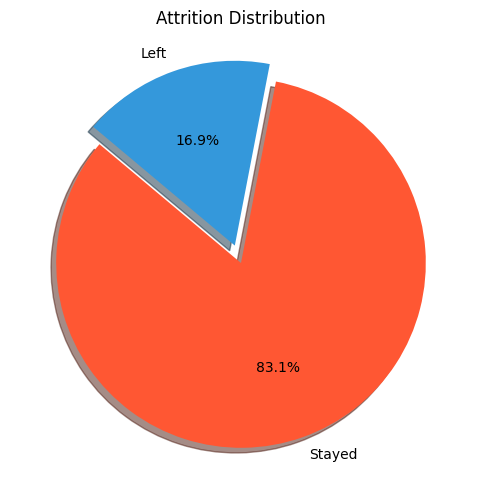

In [37]:
# Hitung jumlah karyawan yang keluar(1) dan tetap(0)
attrition_counts = data['Attrition'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
colors = ['#FF5733', '#3498db']  # Warna untuk kategori Attrition
labels = ['Stayed', 'Left']  # Label kategori
explode = (0, 0.1)  # Pisahkan sedikit kategori "Left"

plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%', colors=colors,
        startangle=140, explode=explode, shadow=True)

plt.title('Attrition Distribution')
plt.show()

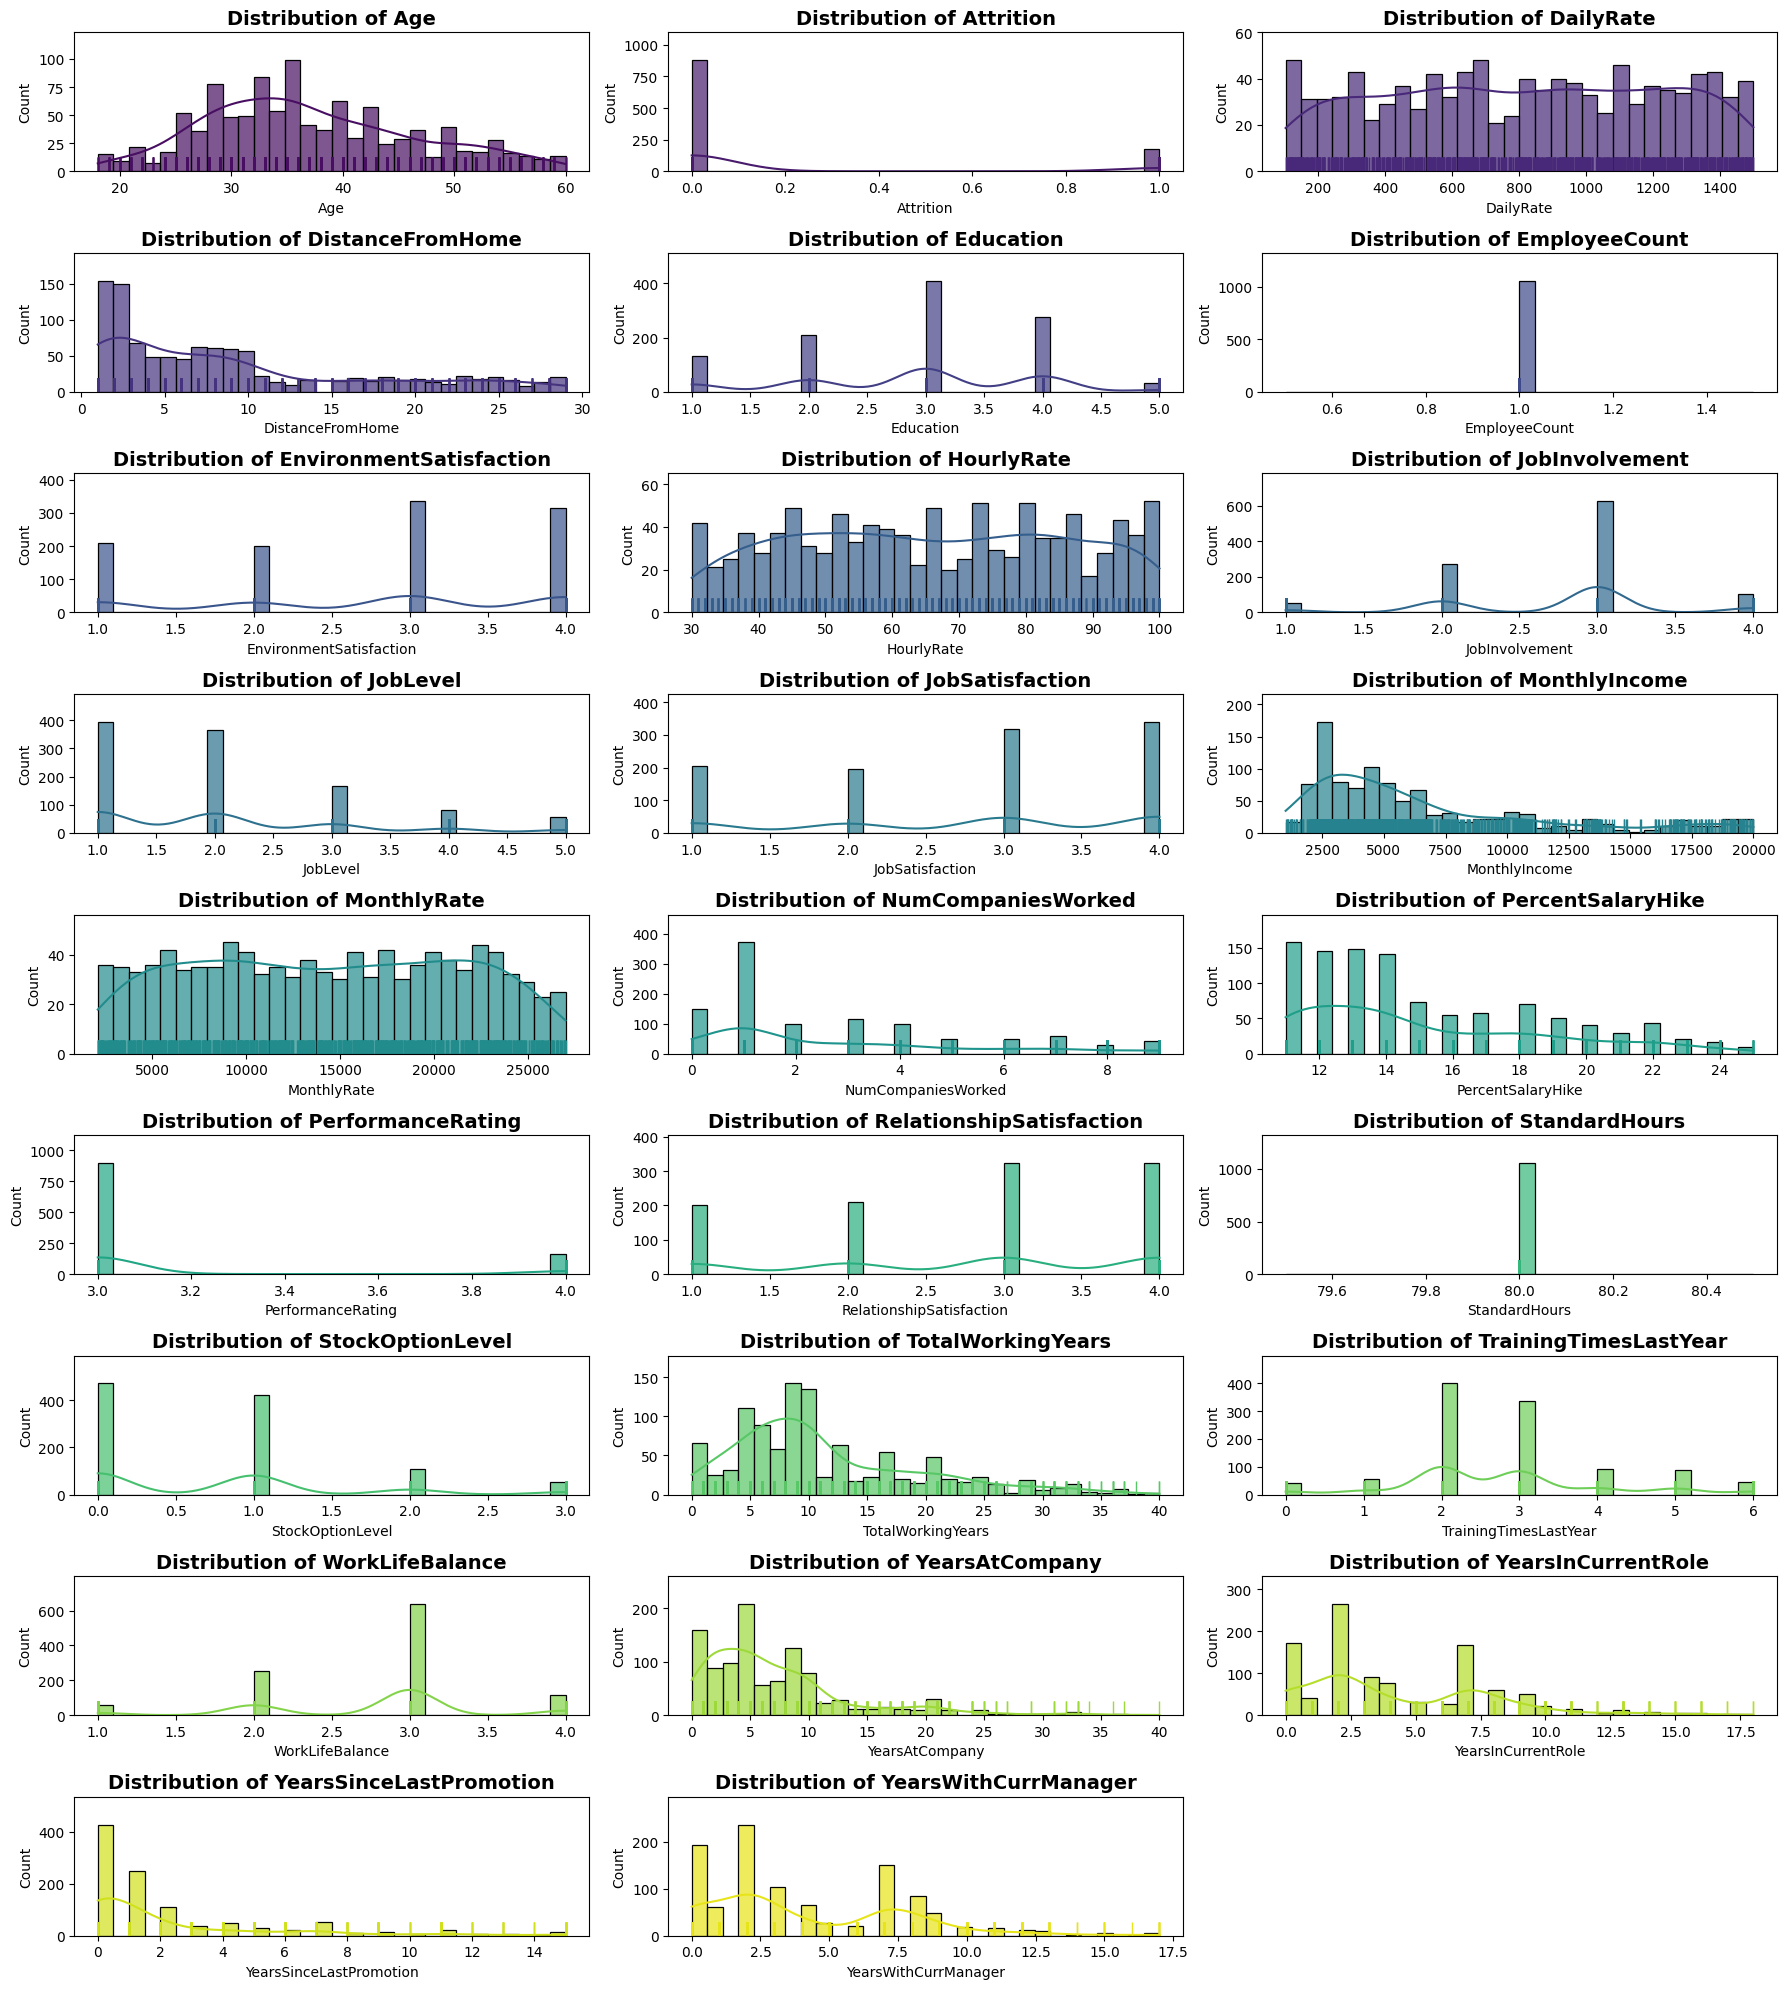

In [38]:
# Univariate analysis untuk numeric variable
plt.figure(figsize=(18, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)

    # Pilih warna dari palet "viridis"
    color = sns.color_palette("viridis", len(numeric_columns))[i-1]

    # Histogram dengan KDE dan rugplot untuk melihat distribusi
    sns.histplot(data[col], kde=True, color=color, bins=30, edgecolor='black', alpha=0.7)
    sns.rugplot(data[col], color=color, height=0.1)  # Tambahkan rugplot di bawah

    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


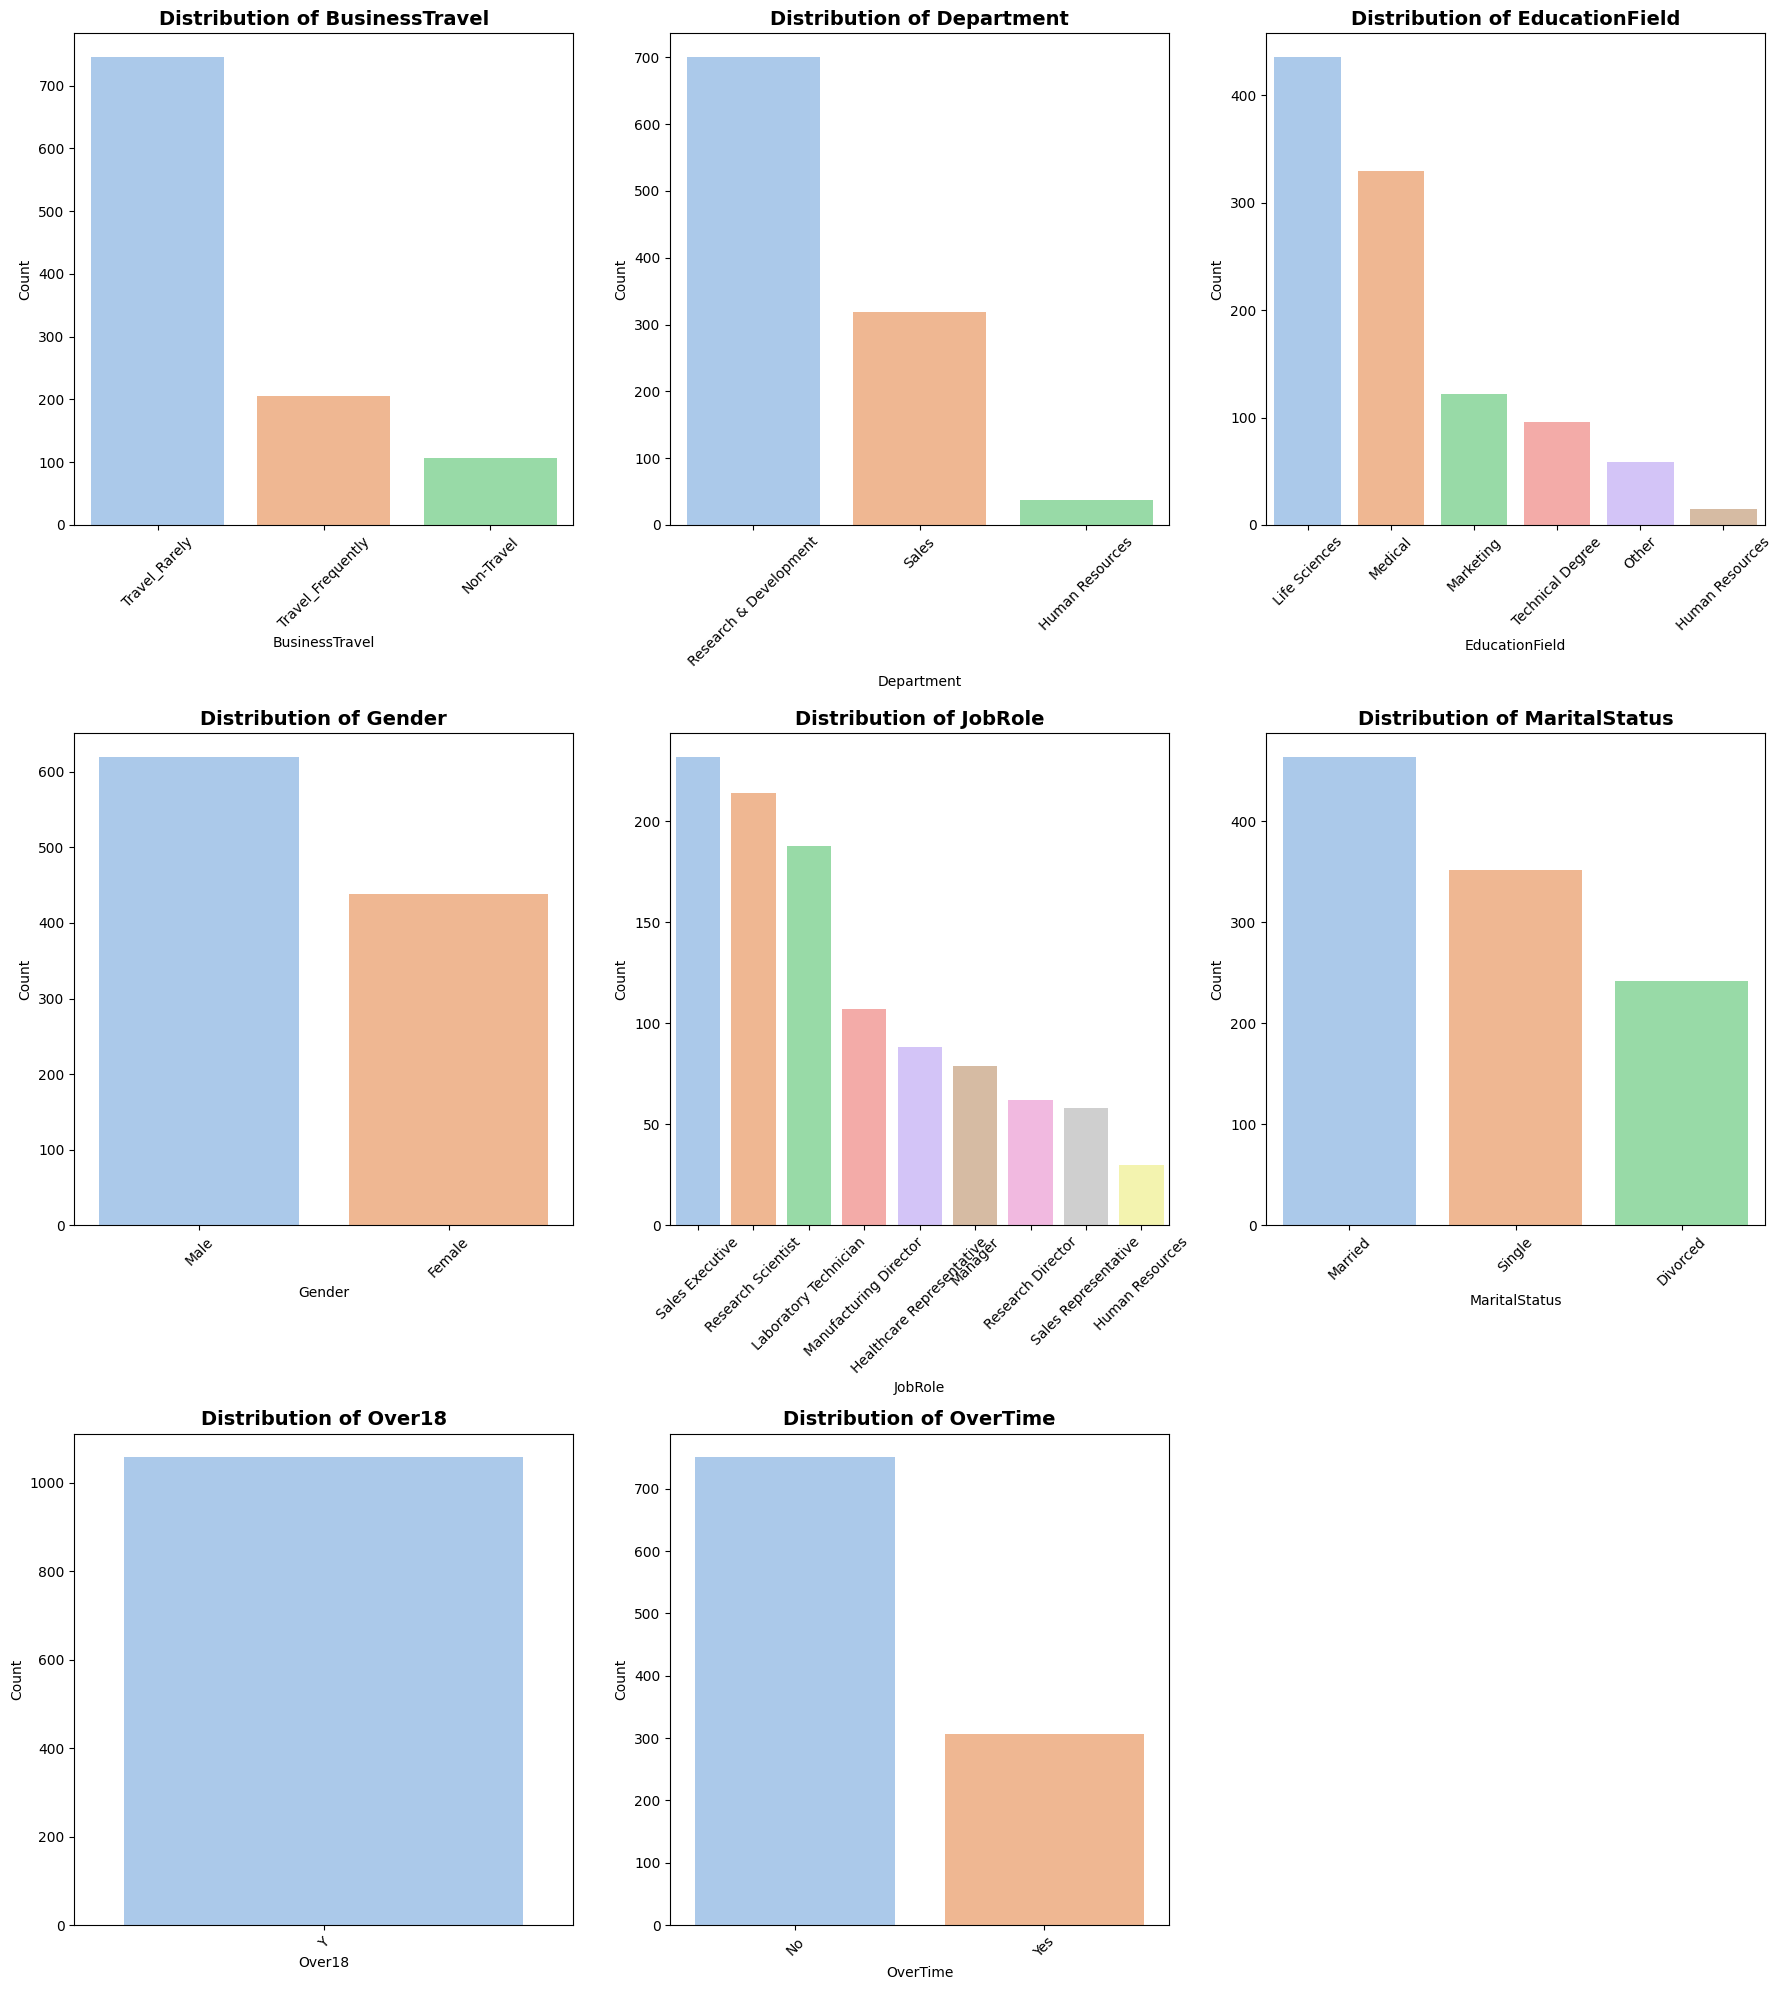

In [39]:
# Univariate analysis untuk categorical variable
plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)
    order = data[col].value_counts().index  # Urutkan berdasarkan frekuensi
    colors = sns.color_palette("pastel", len(order))  # Warna pastel untuk variasi

    # Calculate value counts and store in a separate variable
    value_counts = data[col].value_counts()

    # Pass the index and values to sns.barplot
    sns.barplot(x=value_counts.index, y=value_counts.values, order=order, palette=colors)

    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Multivariate Analysis

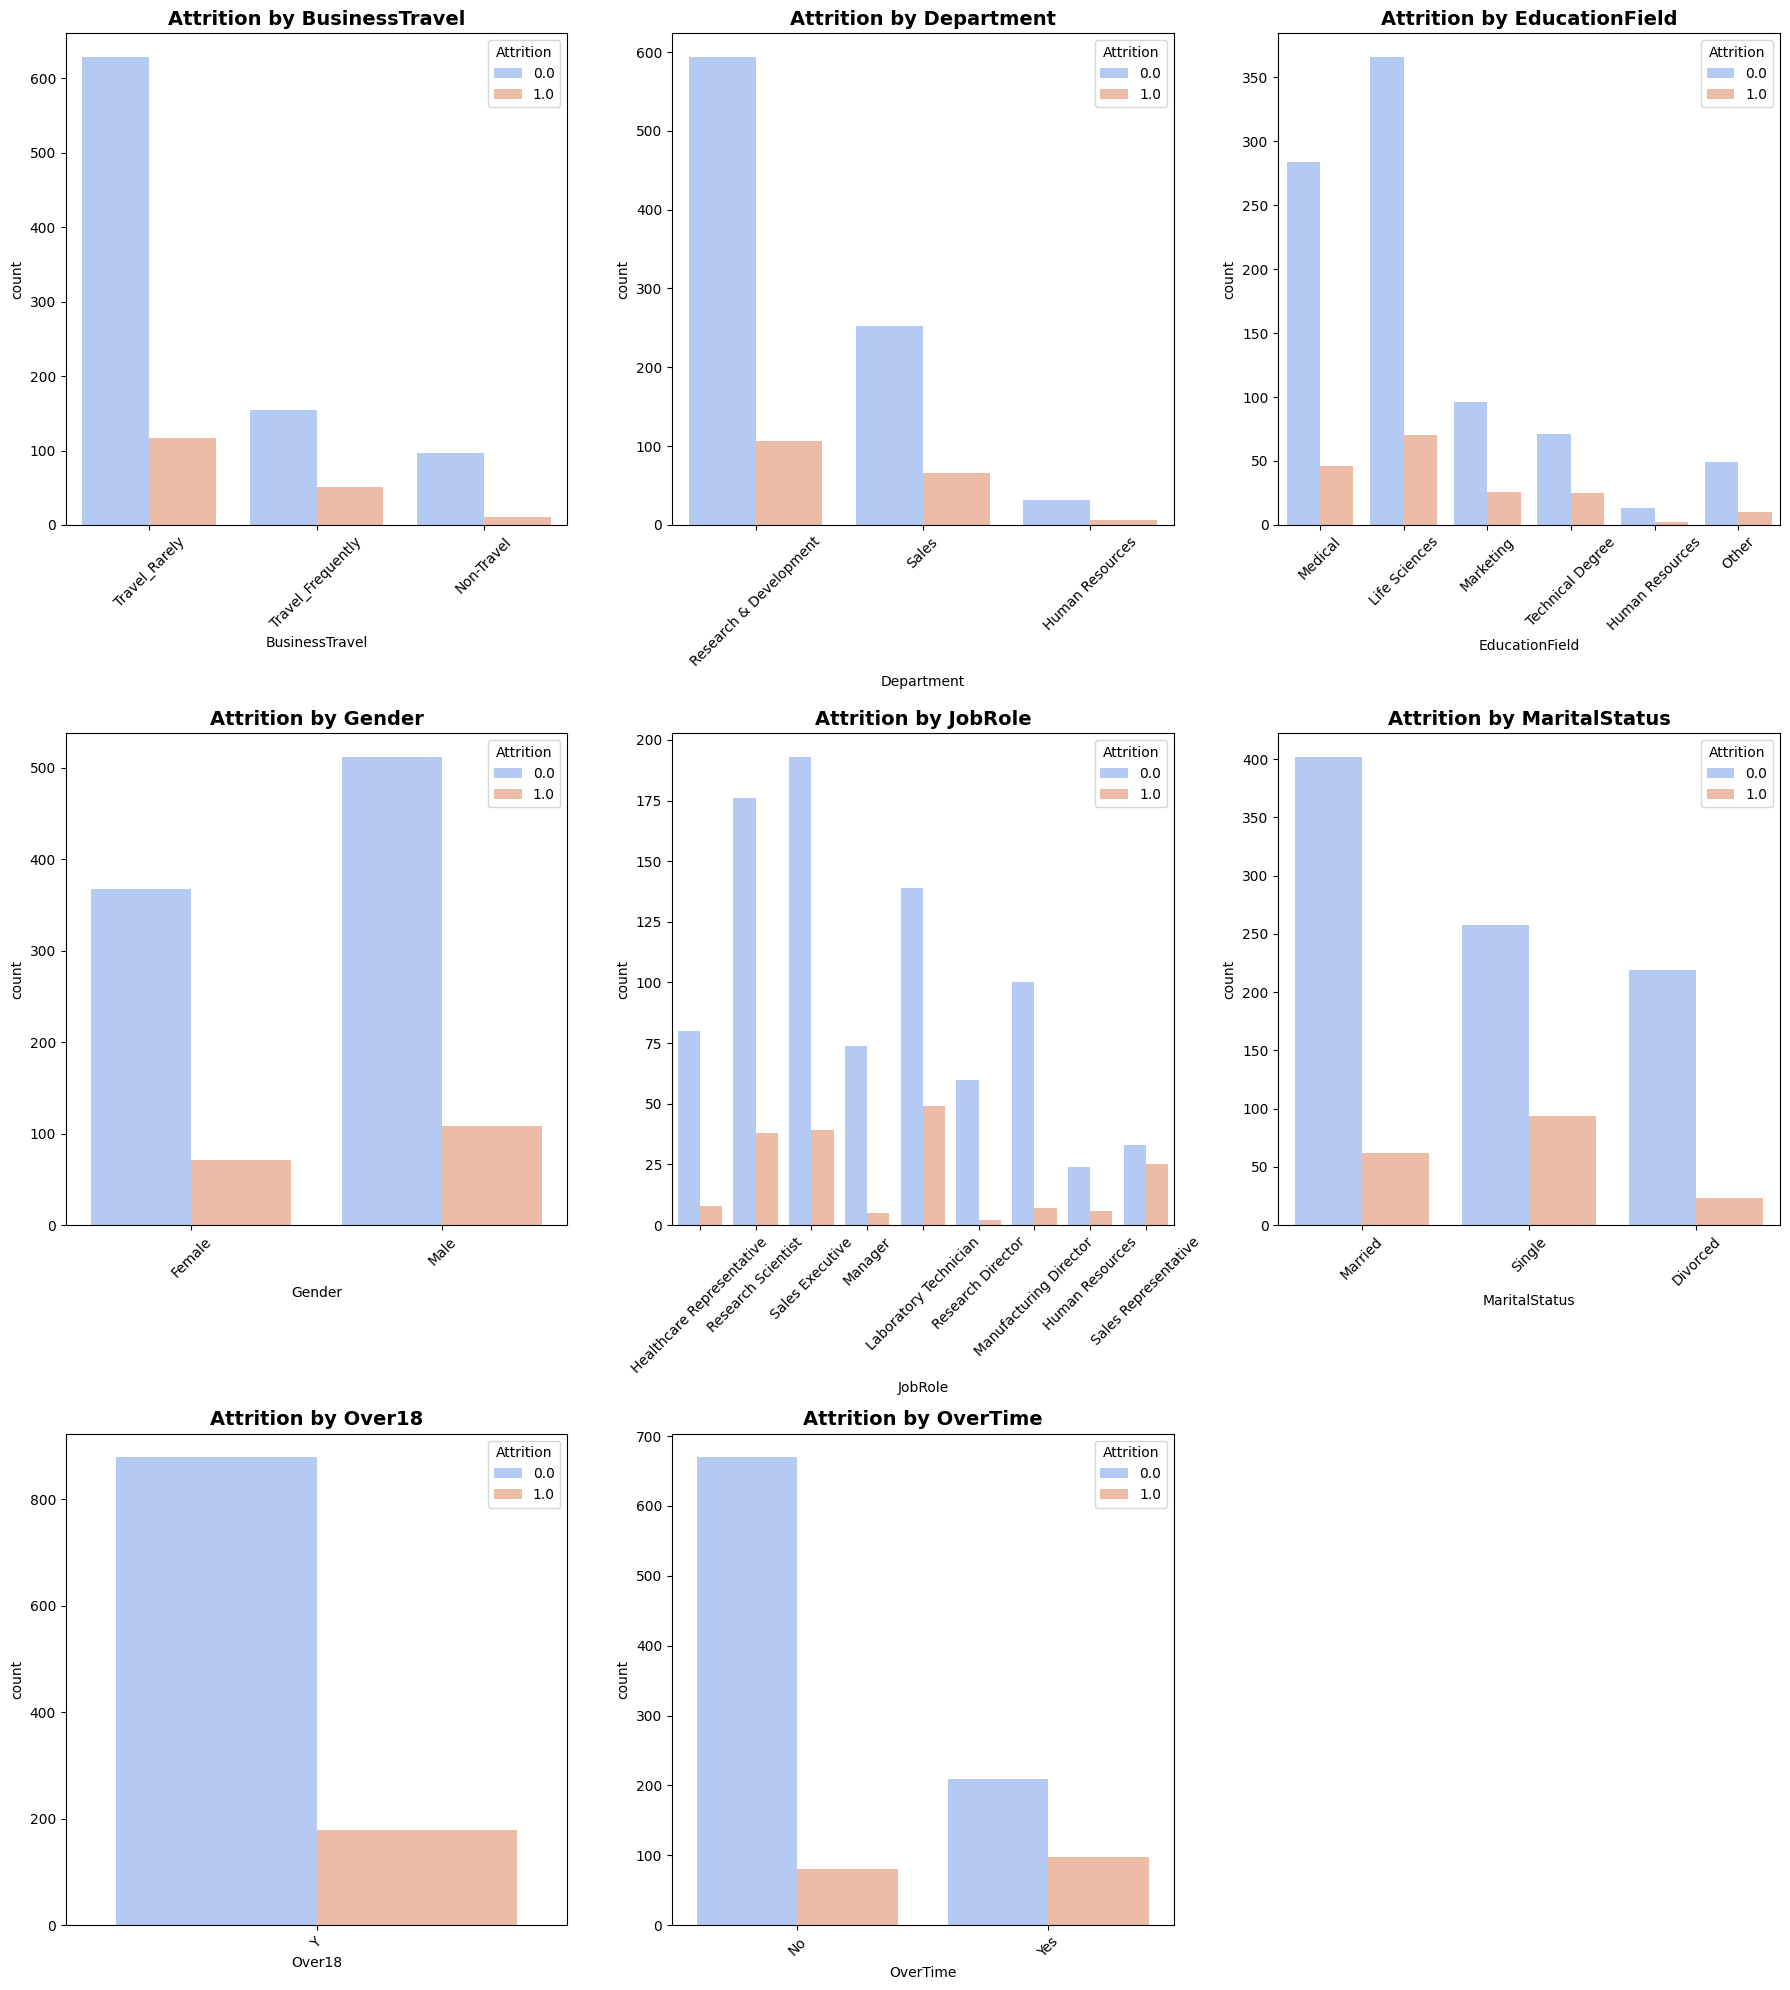

In [40]:
plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)

    sns.countplot(data=data, x=col, hue='Attrition', palette="coolwarm")

    plt.title(f'Attrition by {col}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

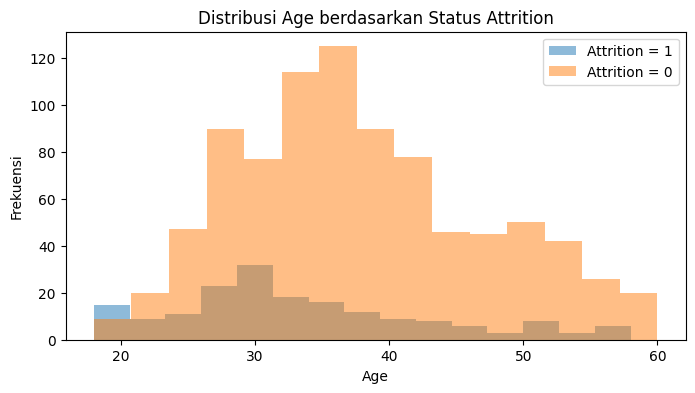

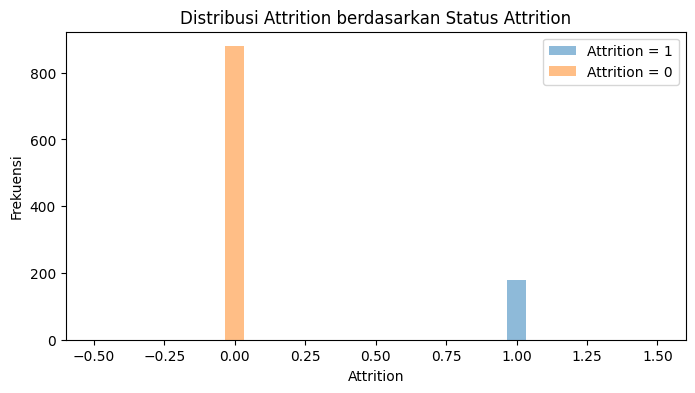

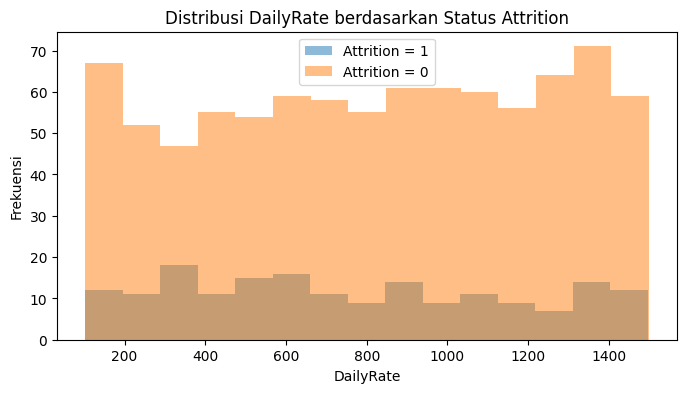

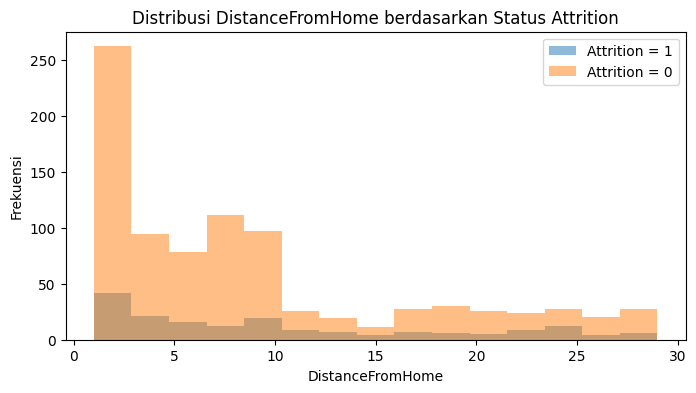

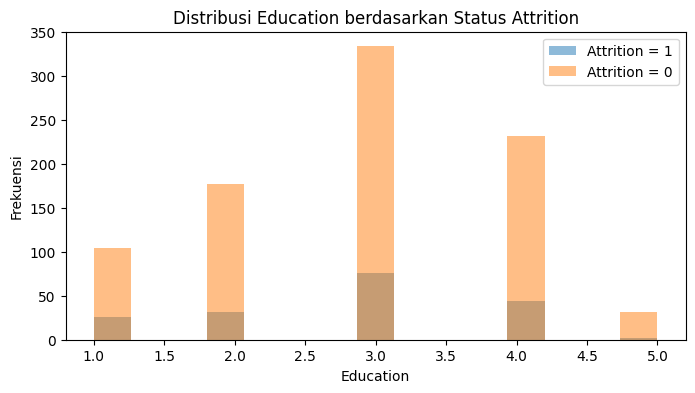

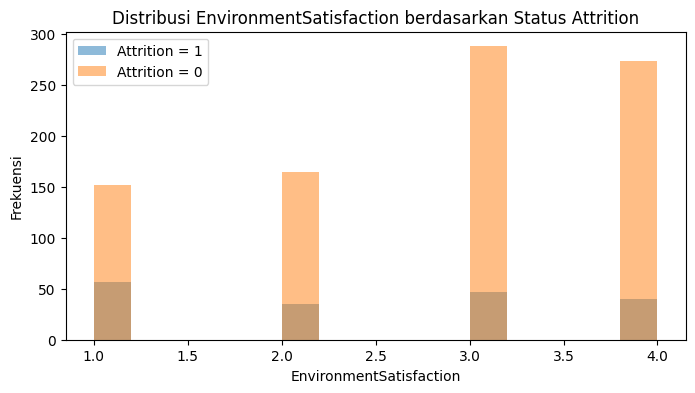

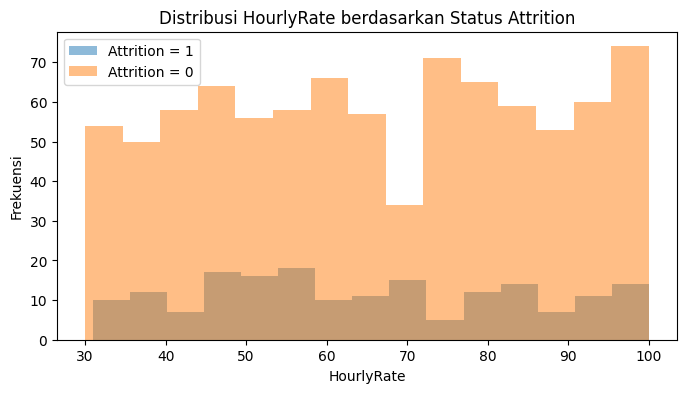

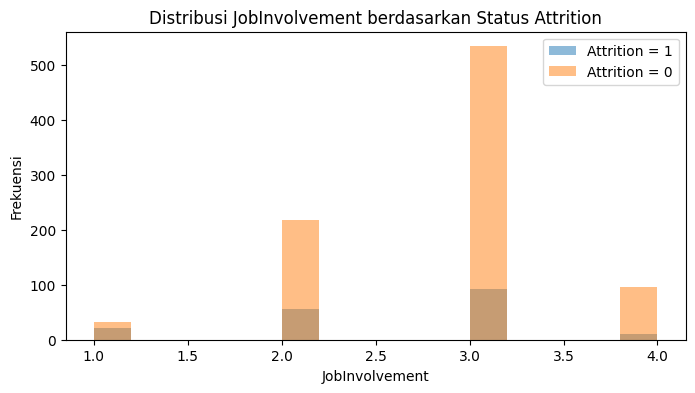

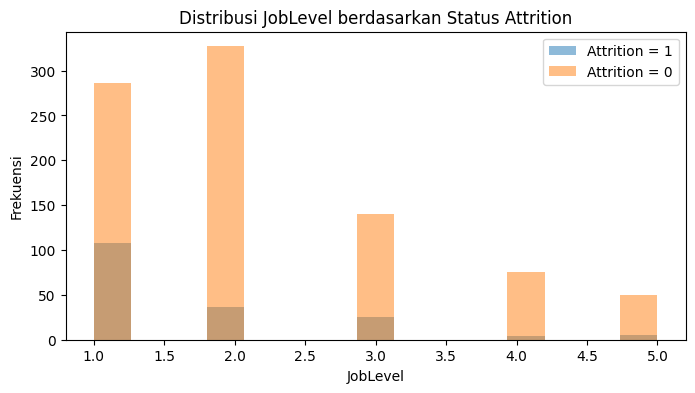

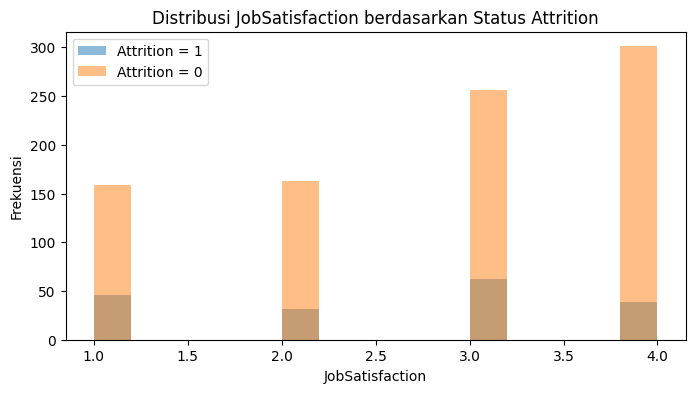

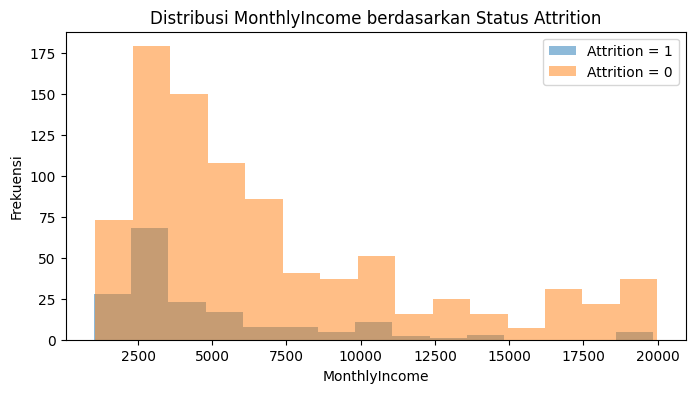

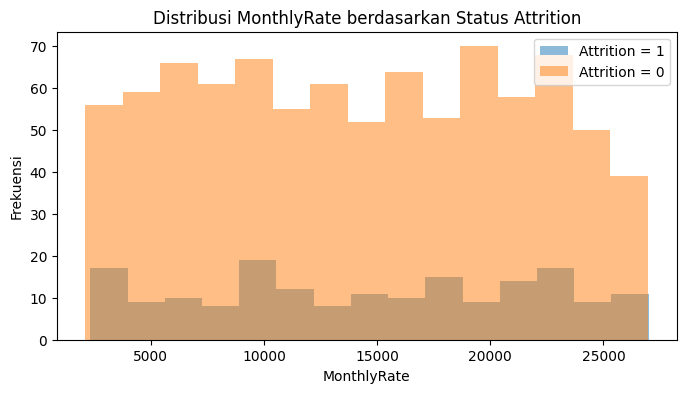

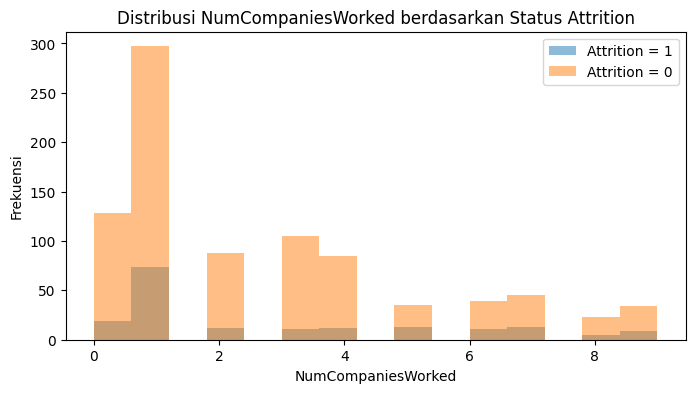

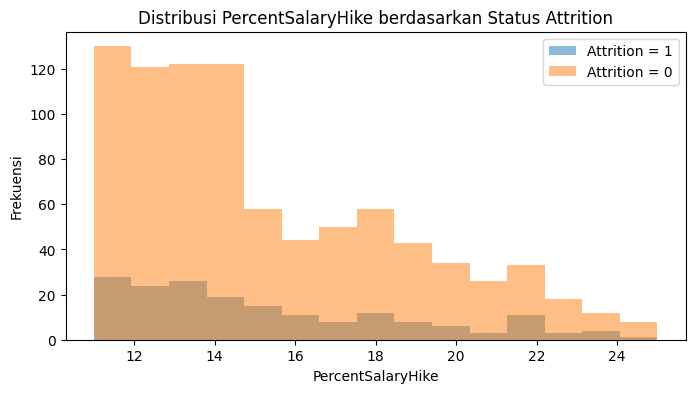

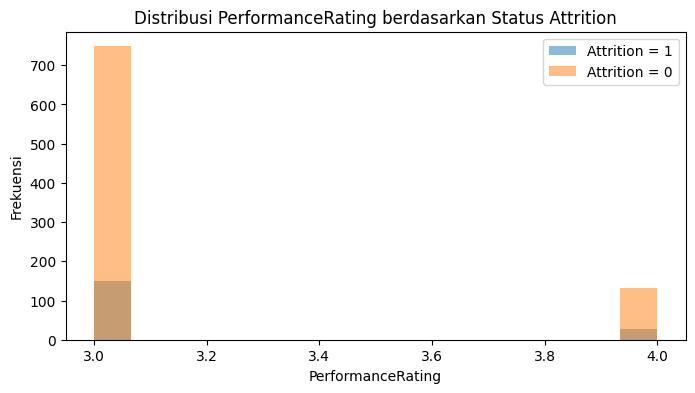

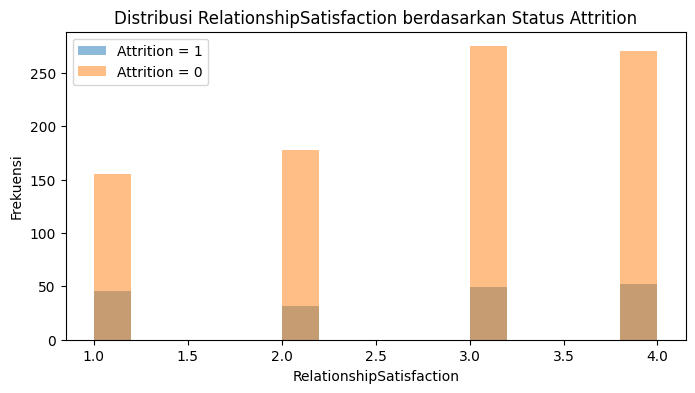

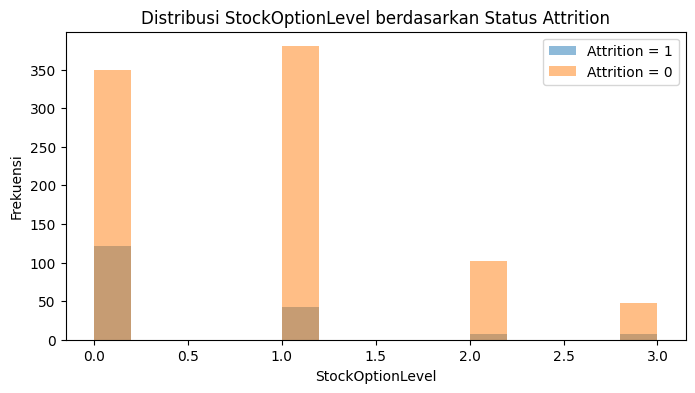

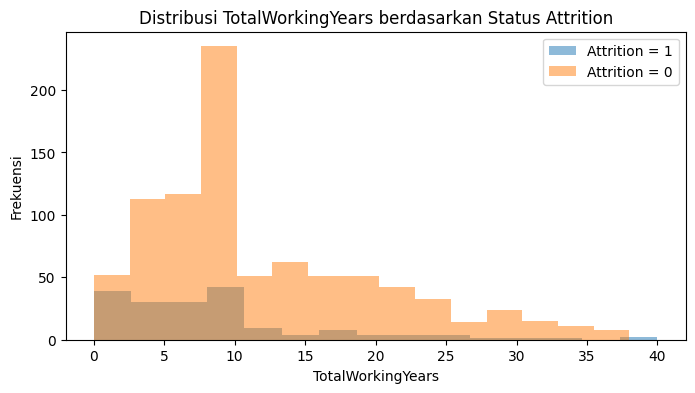

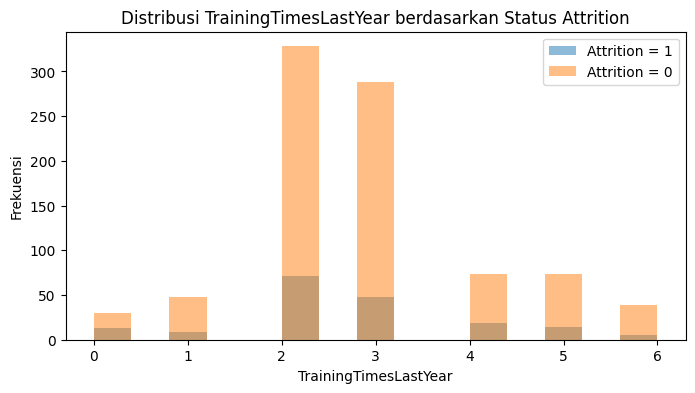

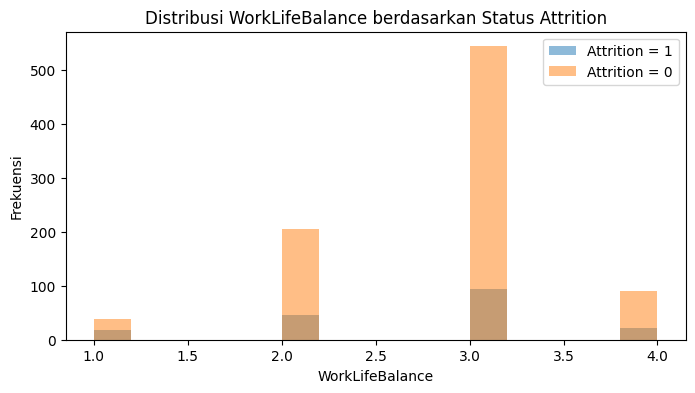

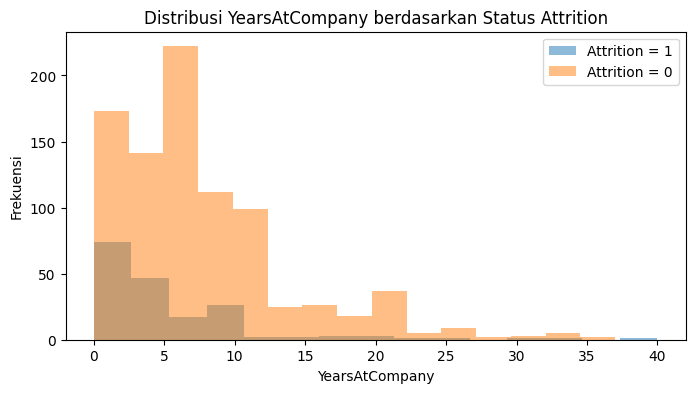

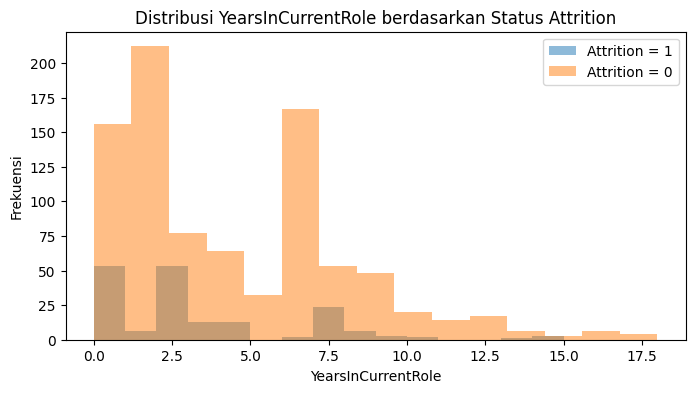

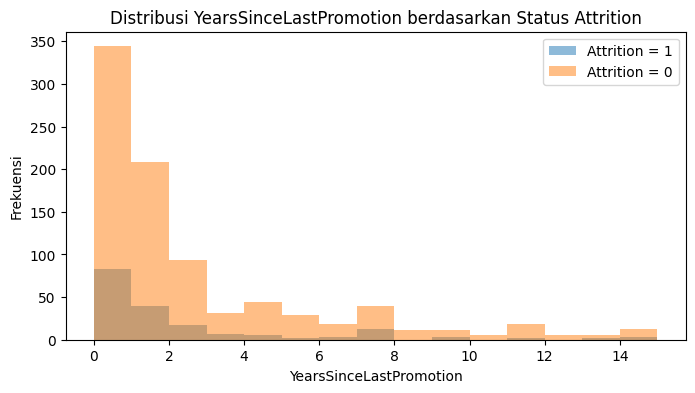

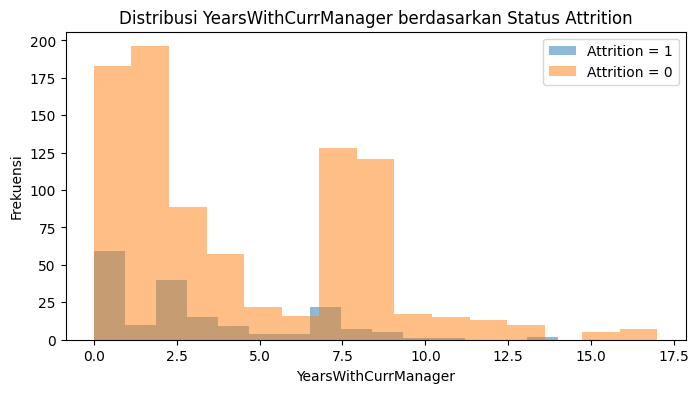

In [41]:
# Hapus kolom yang tidak relevan untuk analisis attrition (misalnya, EmployeeCount atau kolom dengan nilai konstan)
irrelevant_columns = ['EmployeeCount', 'StandardHours', 'Over18']
numeric_columns = [col for col in numeric_columns if col not in irrelevant_columns]

# Plot histogram untuk setiap kolom numerik, dikelompokkan berdasarkan status 'Attrition'
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    # Histogram untuk karyawan yang keluar (Attrition = 1)
    data[data['Attrition'] == 1][col].hist(bins=15, alpha=0.5, label='Attrition = 1', align='mid')
    # Histogram untuk karyawan yang tetap (Attrition = 0)
    data[data['Attrition'] == 0][col].hist(bins=15, alpha=0.5, label='Attrition = 0', align='mid')
    plt.title(f'Distribusi {col} berdasarkan Status Attrition')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(False)

    plt.show()

### Analysis Correlation Feature

In [42]:
#  Using Lable encoding
le = LabelEncoder()
df_encoded = data.apply(le.fit_transform)
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,19,1,2,529,1,10,1,3,0,0,...,0,0,0,15,2,0,1,0,0,0
2,33,1,2,629,1,3,3,1,0,0,...,2,0,3,18,2,3,10,0,2,7
3,24,0,1,229,2,25,2,2,0,2,...,3,0,1,23,2,3,20,4,4,8
6,22,0,2,519,2,0,1,3,0,1,...,2,0,3,6,2,1,4,3,0,2
7,37,1,2,325,1,1,2,3,0,3,...,3,0,1,24,2,2,5,2,1,4


In [43]:
# Hapus kolom yang tidak relevan
data_2 = df_encoded.drop(columns=irrelevant_columns)
data_2.shape

(1058, 31)

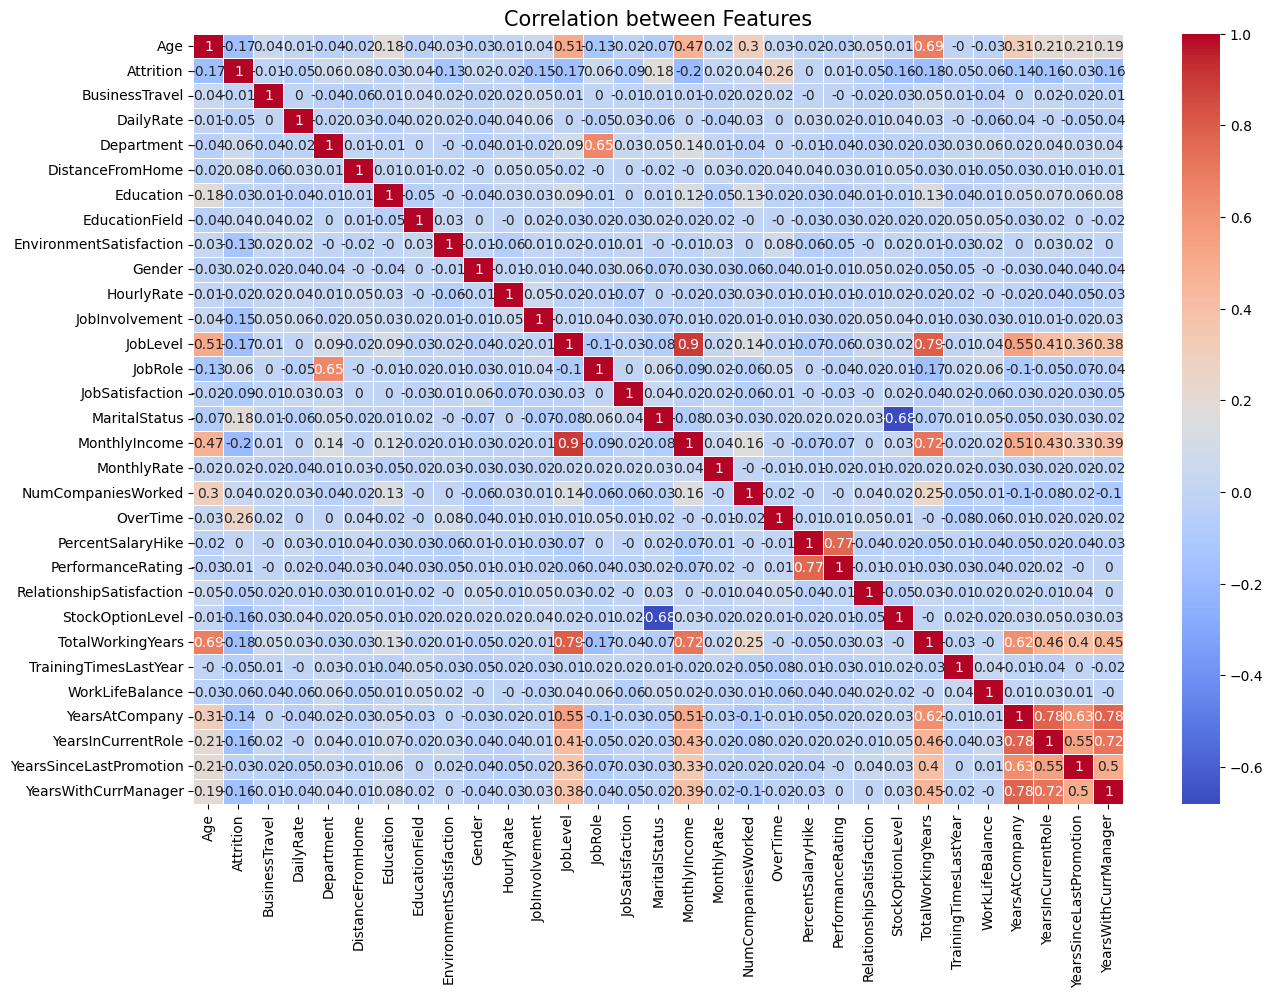

In [44]:
# Memetakan korelasi antar fitur menggunakan heatmap
# Filter kolom numerik
numeric_data_2 = data_2.select_dtypes(include=['number'])

corelation = numeric_data_2.corr().round(2)

plt.figure(figsize=(15,10))
sns.heatmap(corelation, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation between Features', fontsize=15)
plt.show()

Factors  correlated with Attrition:
OverTime                    0.255856
MaritalStatus               0.177989
DistanceFromHome            0.078074
Department                  0.060796
JobRole                     0.056146
EducationField              0.040568
NumCompaniesWorked          0.037429
MonthlyRate                 0.023760
Gender                      0.015887
PerformanceRating           0.007755
PercentSalaryHike           0.004907
BusinessTravel             -0.008008
HourlyRate                 -0.017524
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051946
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.141131
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
StockOptionLevel           -0.164228
Jo

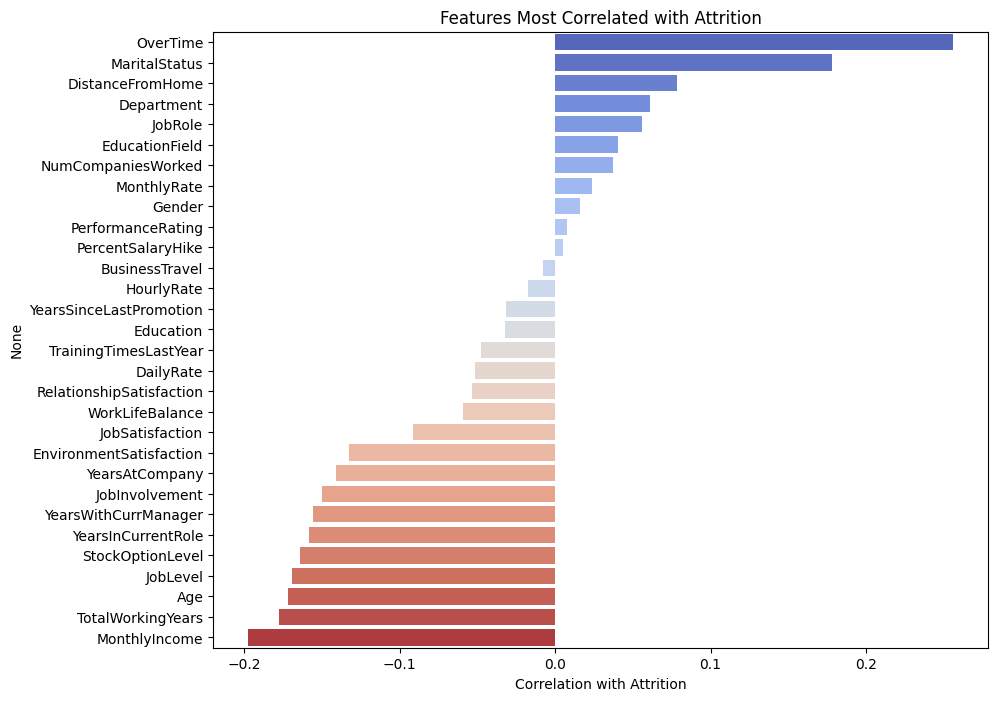

In [45]:
categorical_columns = data_2.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data_2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
data_2_encoded = pd.get_dummies(data_2, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = data_2_encoded.corr()

# Ambil korelasi dengan kolom 'Attrition'
attrition_correlation = correlation_matrix["Attrition"].sort_values(ascending=False)

factors = attrition_correlation
factors = factors.drop('Attrition')

print("Factors  correlated with Attrition:")
print(factors)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values, y=factors.index, hue=factors.index, dodge=False, palette="coolwarm", legend=False)
plt.title("Features Most Correlated with Attrition")
plt.xlabel("Correlation with Attrition")
plt.show()

## Data Preparation / Preprocessing

### Melakukan Pembagian Dataset

In [46]:
data_2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [47]:
# Misalkan kita punya dataset data_2 dengan fitur X dan target y
X = data_2.drop(columns=['Attrition'])  # Fitur
y = data_2['Attrition']  # Target

In [48]:
# melakukan pembagian data X dan y dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state=42)
print(f'Total jumlah sample pada dataset: {len(X)}')
print(f'Total jumlah sample pada train dataset: {len(X_train)}')
print(f'Total jumlah sample pada test dataset: {len(X_test)}')

Total jumlah sample pada dataset: 1058
Total jumlah sample pada train dataset: 846
Total jumlah sample pada test dataset: 212


In [49]:
# mengatasi outlier fungsi LocalOutlierFactor
lof = LocalOutlierFactor().fit_predict(X_train)
mask = lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

### Melakukan Standarisasi pada Fitur

In [50]:
# melakukan standarisasi dengan fungsi StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

In [51]:
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

### KNN

==== KNN Classifier ====
Confusion Matrix:
[[172   1]
 [ 35   4]]
Accuracy: 0.8302
Precision: 0.8252
Recall: 0.8302
F1-Score: 0.7722

----------------------------------------



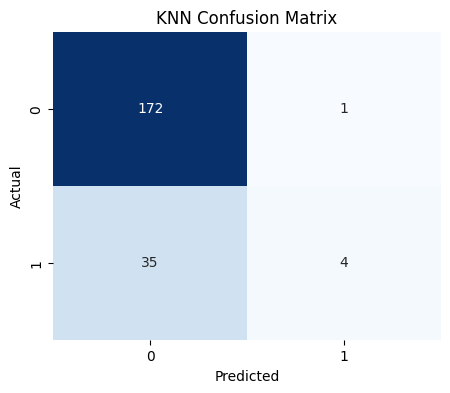

In [24]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_knn, average='weighted')       # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_knn, average='weighted')             # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

==== Random Forest Classifier ====
Confusion Matrix:
[[173   0]
 [ 32   7]]
Accuracy: 0.8491
Precision: 0.8726
Recall: 0.8491
F1-Score: 0.8029

----------------------------------------



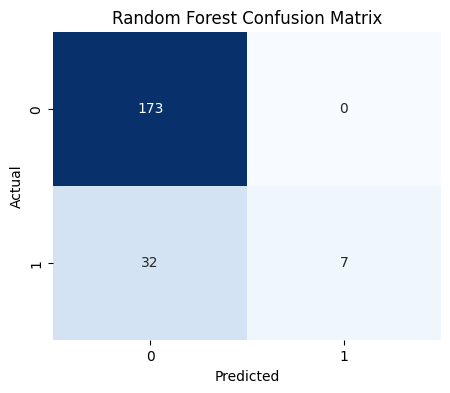

In [52]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_rf, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_rf, average='weighted')            # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-" * 40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVC

==== SVM Classifier ====
Confusion Matrix:
[[172   1]
 [ 33   6]]
Accuracy: 0.8396
Precision: 0.8424
Recall: 0.8396
F1-Score: 0.7906

----------------------------------------



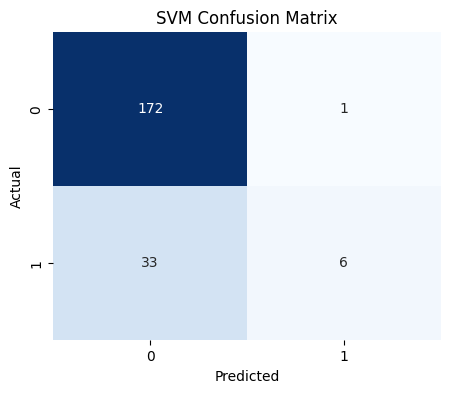

In [53]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Print the confusion matrix
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_svm, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_svm, average='weighted')            # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-" * 40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Evaluation

In [54]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 2),
        'Precision': round(precision_score(y_test, y_pred, average='weighted') * 100, 2),
        'Recall': round(recall_score(y_test, y_pred, average='weighted') * 100, 2),
        'F1-Score': round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    }
    return results

# Evaluate each model and collect results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy %', 'Precision %', 'Recall %', 'F1-Score %'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),83.02,82.52,83.02,77.22
1,Random Forest (RF),84.91,87.26,84.91,80.29
2,Support Vector Machine (SVM),83.96,84.24,83.96,79.06


Penjelasan:

Hasil evaluasi diatas menunjukkan bahwa algoritma yang memiliki tingkat performa teratas yaitu Random Forest dengan akurasi 84.91%.

**Kesimpulan**
* Random Forest (RF) memiliki akurasi paling tinggi diantara 3 model diatas (84.91%).
* Disusul oleh Support Vector Machine (SVM) dengan (83.96%).
* K-Nearest Neighbors (KNN) memiliki akurasi terendah (83.02%) di antara semua model.

Rekomendasi: Random Forest (RF) pilihan terbaik jika hanya mempertimbangkan akurasi.

In [28]:
# # Simpan model Random Forest
# joblib.dump(rf, 'attrition_rf_model.pkl')

['attrition_rf_model.pkl']

In [58]:
with open('attrition_rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)